    A Segment Tree is a data structure that allows answering range queries over an array effectively, while still being flexible enough to allow modifying the array.
    This includes finding the sum of consecutive array elements a[l…r], or finding the minimum element in a such a range in O(logn) time. (normalde consecutive element'lerin toplamını bulma işlemini toplamda O(n) sürede halledebilirdik ancak bunu yaparken arada array element'lerini değiştiremezdik(çok uzun sürerdi), segment tree ise hem toplamları bulmamızı hem de istediğimiz zaman array elementlerini çok daha hızlı bir şekilde değiştirebilmemizi sağlar)
    
    Between answering such queries the Segment Tree allows modifying the array by replacing one element, or even change the elements of a whole subsegment (e.g. assigning all elements a[l…r] to any value, or adding a value to all element in the subsegment).

    In general a Segment Tree is a very flexible data structure, and a huge number of problems can be solved with it. Additionally it is also possible to apply more complex operations and answer more complex queries.
    One important property of Segment Trees is, that they require only a linear amount of memory. The standard Segment Tree requires 4n vertices for working on an array of size n.

### Simplest form

    We want to answer sum queries efficiently. The formal definition of our task is: We have an array a[0…n−1], and the Segment Tree must be able to find the sum of elements between the indices l and r (i.e. computing the sum i=l∑r a[i]), and also handle changing values of the elements in the array.
    
    We compute and store the sum of the elements of the whole array, i.e. the sum of the segment a[0…n−1]. We then split the array into two halves a[0…n/2] and a[n/2+1…n−1] and compute the sum of each halve and store them. Each of these two halves in turn also split in half, their sums are computed and stored. And this process repeats until all segments reach size 1. 
    In other words we start with the segment a[0…n−1], split the current segment in half (if it has not yet become a segment containing a single element), and then calling the same procedure for both halves.
    
    Here is a visual representation of such a Segment Tree over the array a=[1,3,−2,8,−7]:
    
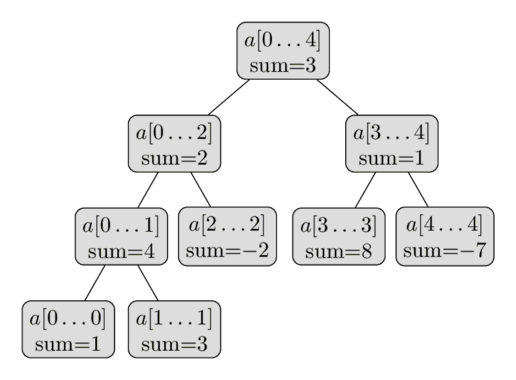

    It is worth noting that whenever n is not a power of two, not all levels of the Segment Tree will be completely filled. We can see that behavior in the image. For now we can forget about this fact, but it will become important later during the implementation.
    
    The height of the Segment Tree is O(logn), because when going down from the root to the leaves the size of the segments decreases approximately by half.

    Construction 
    
    Now, for construction of the segment tree, we start at the bottom level (the leaf vertices) and assign them their respective values. On the basis of these values, we can compute the values of the previous level, using the merge function(the function that merges two siblings in a segment tree) . And on the basis of those, we can compute the values of the previous, and repeat the procedure until we reach the root vertex.

    It is convenient to describe this operation recursively in the other direction, i.e., from the root vertex to the leaf vertices.
    The time complexity of this construction is O(n), assuming that the merge operation is constant time (the merge operation gets called n times, which is equal to the number of internal nodes in the segment tree).

    For now we are going to answer sum queries. As an input we receive two integers l and r, and we have to compute the sum of the segment a[l…r] in O(logn) time.

    To do this, we will traverse the Segment Tree and use the precomputed sums of the segments. Let's assume that we are currently at the vertex that covers the segment a[tl…tr]. There are three possible cases.

    The easiest case is when the corresponding segment of the current vertex a[tl…tr] is completely within interval a[l…r] (i.e. l <= tl and r >= tr), then we are finished and can return the precomputed sum that is stored in the vertex.

    Alternatively the segment of the query can fall completely into the domain of either the left or the right child. Recall that the left child covers the segment a[tl…tm] and the right vertex covers the segment a[tm+1…tr] with tm=(tl+tr)/2. In this case we can simply go to the child vertex, which corresponding segment covers the query segment, and execute the algorithm described here with that vertex.

    And then there is the last case, the query segment intersects with both children. In this case we have no other option as to make two recursive calls, one for each child. First we go to the left child, compute a partial answer for this vertex (i.e. the sum of values of the intersection between the segment of the query and the segment of the left child), then go to the right child, compute the partial answer using that vertex, and then combine the answers by adding them.(Compute a[tl...tr] as a[tl...tm] + a[tm + 1...tr])
    
    The procedure is illustrated in the following image. Again the array a=[1,3,−2,8,−7] is used, and here we want to compute the sum from vertex 2 to 4. The colored vertices will be visited, and we will use the precomputed values of the green vertices. This gives us the result −2+1=−1.
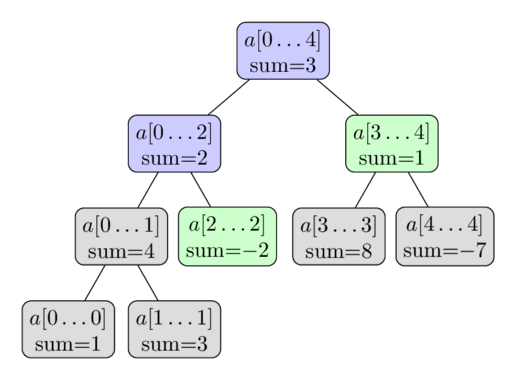

    To show this complexity we look at each level of the tree. It turns out, that for each level we only visit not more than four vertices. Therefore we visit at most 4logn (since the height of the tree is O(logn)) vertices in total, and that is equal to a running time of O(logn). 

    Update queries
    Now we want to modify a specific element in the array, let's say we want to do the assignment a[i]=x. And we have to rebuild the Segment Tree, such that it correspond to the new, modified array.

    Each level of a Segment Tree forms a partition of the array. Therefore an element a[i] only contributes to one segment from each level. Thus only O(logn) vertices need to be updated. The update request can be implemented using a recursive function.
    
    Here is a visualization using the same array. Here we perform the update a[2]=3. The green vertices are the vertices that we visit and update.
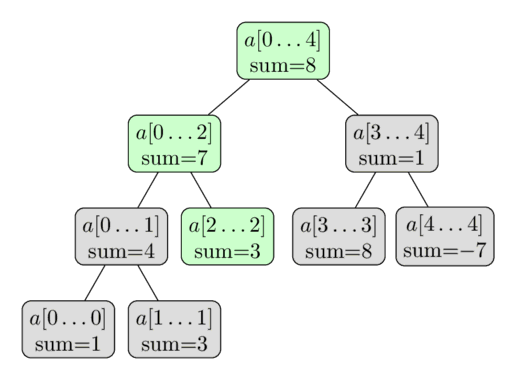

    Implementation
    The main consideration is how to store the Segment Tree. Of course we can define a Vertex struct and create objects, that store the boundaries of the segment, its sum and additionally also pointers to its child vertices. However this requires storing a lot of redundant information. We will use a simple trick, to make this a lot more efficient. 
    We only store the sums in an array. The sum of the root vertex at index 1, the sums of its two child vertices at indices 2 and 3, the sums of the children of those two vertices at indices 4 to 7, and so on. It is easy to see, that the left child of a vertex at index i is stored at index 2i, and the right one at index 2i+1.
    
    We need to store at most 4n vertices. It might be less, but for convenience we always allocate an array of size 4n.

In [3]:
n = int(input())

tree = [0]*4*n

#input_array is an array with length of n.  
#v is the index of the current vertex
#tl and tr are the boundaries of the current segment
# we will start building the segment tree from the root vertex: v = 1, tl = 0, tr = n - 1
def build(input_array, v, tl, tr): 
    if tl == tr: 
        tree[v] = input_array[tl]
    else: 
        tm = (tl + tr)//2
        build(input_array, v*2, tl, tm)
        build(input_array, v*2 + 1, tm + 1, tr)
        tree[v] = tree[v*2] + tree[v*2 + 1]

#v is the index of the current vertex
#tl and tr are the boundaries of the current segment
#l and r are the boundaries of the query we want to find sum of
#we will start finding the sum from the root vertex: v = 1, tl = 0, tr = n - 1
def findSum(v, tl, tr, l, r): 
    if l <= tl and tr <= r:
        return tree[v]
    if l > tr or r < tl: 
        return 0
    
    tm = (tl + tr)//2
    return findSum(v*2, tl, tm, l, r) + findSum(v*2 + 1, tm + 1, tr, l, r)

#pos will be the position of the newVal in the inputArray
#we will start updating the segment tree from the root vertex: v = 1, tl = 0, tr = n - 1
def update(v, tl, tr, pos, newVal):
    if tl == tr: 
        tree[v] = newVal
    else: 
        tm = (tl + tr)//2
        if pos <= tm:
            update(v*2, tl, tm, pos, newVal)
        else: 
            update(v*2 + 1, tm + 1, tr, pos, newVal)
        tree[v] = tree[v*2] + tree[v*2 + 1]



10


In [ ]:
#Başka bir örnek: Verilen aralıktaki min değeri bulmak 

def build(v, tl, tr): 
    if tl == tr: 
        tree[v] = array[tl]
    else: 
        tm = (tl + tr)//2
        build(2*v, tl, tm)
        build(2*v + 1, tm + 1, tr)
        tree[v] = min(tree[2*v], tree[2*v + 1])

def findMin(v, tl, tr, l, r): 
    if l <= tl and tr <= r:
        return tree[v]
    if tr < l or tl > r: 
        return float("inf")
    
    tm = (tl + tr)//2
    return min(findMin(2*v, tl, tm, l, r), findMin(2*v + 1, tm + 1, tr, l, r))   

def update(v, tl, tr, pos, newVal): 
    if tl == tr: 
        tree[v] = newVal
    else: 
        tm = (tl + tr)//2
        if pos <= tm: 
            update(2*v, tl, tm, pos, newVal)
        else: 
            update(2*v + 1, tm + 1, tr, pos, newVal)
        tree[v] = min(tree[2*v], tree[2*v + 1])

n, q = map(int, input().split(" "))
array = list(map(int, input().split(" ")))

tree = [0]*4*n
build(1, 0, n - 1)
for i in range(q): 
    op, a, b = input().split(" ")
    if op == "q": 
        print(findMin(1, 0, n - 1, int(a) - 1, int(b) - 1))
    elif op == "u": 
        update(1, 0, n - 1, int(a) - 1, int(b))
        
#Aynı şekilde segment tree'yi kullanarak maximum veya minimum olan değerin count'ını da hesaplayabiliriz.(child'lara bakarken 
#eğer aynı değerseler count'larını toplarız değilseler max veya min olanı alırız)

    Computing the greatest common divisor / least common multiple can be done with the same way as the segment trees we derived for sum/min-max queries. 

    Counting number of zeroes, searching for the k-th zero
    In this problem we want to find the number of zeros in a given range, and additionally find the index of the k-th zero using a second function.

In [7]:
def build(v, tl, tr): 
    if tl == tr: 
        tree[v] = array[tl]
    else: 
        tm = (tl + tr)//2
        build(2*v, tl, tm)
        build(2*v + 1, tm + 1, tr)
        tree[v] = tree[2*v] + tree[2*v + 1]

def count_zeros(v, tl, tr, l, r): 
    if l <= tl and tr <= r: 
        return tree[v]
    if tr < l or tl > r: 
        return 0
    
    tm = (tl + tr)//2
    return count_zeroes(2*v, tl, tm, l, r) + count_zeroes(2*v + 1, tm + 1, tr, l, r)


def find_kth(v, tl, tr, k): 
    #if the array contains less than k zeroes, we will return -1
    if k > t[v]: 
        return -1
    
    if tl == tr: 
        return tl
    
    tm = (tl + tr)//2
    #if left child has more than or equal to k zeroes, we need to go to left side
    if tree[2*v] >= k: 
        return find_kth(2*v, tl, tm, k)
    #if left child has less than k zeroes, then we need to go to right side with decrementing k value
    else: 
        return find_kth(2*v + 1, tm + 1, tr, k - tree[2*v])


    Searching for the first element greater than a given amount
    The task is as follows: for a given value x and a range a[l…r] find the smallest i in the range a[l…r], such that a[i] is greater than x.

    This task can be solved using binary search over max prefix queries with the Segment Tree. However, this will lead to a O(logn*logn) solution.
    
    Instead, we can use the same idea as in the previous sections, and find the position by descending the tree: by moving each time to the left or the right, depending on the maximum value of the left child.

In [8]:
#tl and tr are the boundaries of the current segment
#l and r are the boundaries of the query that we want to find first greater
def get_first(v, tl, tr, l, r, x): 
    if tl > r or tr < l: 
        return -1
    
    if l <= tl and tr <= r: 
        if tree[v] <= x: 
            return -1
        while(tl != tr): 
            tm = tl + (tr - tl)//2
            if tree[2*v] > x: 
                v = 2*v
                tr = mid
            else: 
                v = 2*v + 1
                tl = mid + 1
        return tl
    
    tm = (tl + tr)//2
    ls = get_first(2*v, tl, tm, l, r, x)
    if ls != -1: 
        return ls
    rs = get_first(2*v + 1, tm + 1, tr, l, r, x)
    return rs
#Burda yaptığımız şey ilk önce maximum değeri x'den büyük olan ve sınırları l ve r değerleri arasında olan en büyük aralığı 
#buluyoruz. Daha sonra ise bu aralıkta binary search yaparak x'den büyük olan ilk değeri buluyoruz. 

    Finding subsegments with the maximal sum
    Here again we receive a range a[l…r] for each query, this time we have to find a subsegment a[l′…r′] such that l≤l′ and r′≤r and the sum of the elements of this segment is maximal. As before we also want to be able to modify individual elements of the array. The elements of the array can be negative, and the optimal subsegment can be empty (e.g. if all elements are negative).
    
    This problem is a non-trivial usage of a Segment Tree. This time we will store four values for each vertex: the sum of the segment, the maximum prefix sum, the maximum suffix sum, and the sum of the maximal subsegment in it. In other words for each segment of the Segment Tree the answer is already precomputed as well as the answers for segments touching the left and the right boundaries of the segment.

    How to build a tree with such data? Again we compute it in a recursive fashion: we first compute all four values for the left and the right child, and then combine those to archive the four values for the current vertex. Note the answer for the current vertex is either:

    the answer of the left child, which means that the optimal subsegment is entirely placed in the segment of the left child
    the answer of the right child, which means that the optimal subsegment is entirely placed in the segment of the right child
    the sum of the maximum suffix sum of the left child and the maximum prefix sum of the right child, which means that the optimal subsegment intersects with both children.(this is why we need the maximum prefix and suffix sum for each vertex)
    
    Hence the answer to the current vertex is the maximum of these three values.

In [9]:
class data: 
    sum = 0
    pref = 0
    suffix = 0
    ans = 0
    
#l ve r değerleri left ve right vertexleri(data halinde) temsil ediyor.
def combine(l, r): 
    res = data()
    #sum değeri iki tarafın toplamı olacak
    res.sum = l.sum + r.sum
    #pref değeri solun prefi veyahut sol + sağın prefi olacak
    res.pref = max(l.pref, l.sum + r.pref)
    res.suffix = max(r.suffix, r.sum + l.suffix)

    res.ans = max(max(l.sum, r.sum), l.suffix + r.pref )
    return res

#bir vertexi data halinde initialize etme fonksiyonu
def make_data(val): 
    res = data()
    res.sum = val
    res.pref = res.suffix = res.ans = max(0, val)
    return res

def build(v, tl, tr): 
    if tl == tr: 
        tree[v] = make_data(array[tl])
    else: 
        tm = (tl + tr)//2
        build(2*v, tl, tm)
        build(2*v + 1, tm + 1, tr)
        tree[v] = combine(tree[2*v], tree[2*v + 1])

def update(v, tl, tr, pos, newVal): 
    if tl == tr: 
        tree[v] = make_data(newVal)
    else: 
        tm = (tl + tr)//2
        if pos <= tm: 
            update(2*v, tl, tm, pos, newVal)
        else: 
            update(2*v + 1, tm + 1, tr, pos, newVal)
        tree[v] = combine(tree[2*v], tree[2*v + 1])

def query(v, tl, tr, l, r): 
    if l > r: 
        return make_data(0)
    
    if tl == l and tr == r:
        return tree[v]
    
    tm = (tl + tr)//2
    return combine( query(2*v, tl, tm, l, max(r, tm) ),  
                    query(2*v + 1, tm + 1, tr, max(l, tm + 1), r) )


Question

    Charles is a truck driver in the city of Googleland. Googleland is built in form of a tree with N nodes where each node represents a city and each edge represents a road between two cities. The cities are numbered 1 to N. The capital of Googleland is city 1. Each day Charles picks up a load of weight W in city C and wants to deliver it to city 1 using the simple path (which is unique) between the cities. Each road i has a toll which charges amount Ai if the weight of the load is greater than or equal to a load-limit Li.

    Charles works for Q days, where for each day Charles will be given the starting city C and weight of the load W. For each day find the greatest common divisor of all the toll charges that Charles pays for that day.

In [ ]:
n, q = map(int, input().split(" "))

graph = {i : [] for i in range(1, n + 1) }

for i in range(n - 1): 
    x, y, l, a = map(int, input().split(" "))
    graph[x].append((y, l, a))
    graph[y].append((x, l, a))


def query(v, tl, tr, l, r): 
    if l <= tl and tr <= r:
        return tree[v]
    if tr < l or r < tl: 
        return 0

    tm = (tl + tr)//2
    return gcd(query(2*v, tl, tm, l, r), 
               query(2*v + 1, tm + 1, tr, l, r))

def update(v, tl, tr, pos, newVal): 
    if tl == tr: 
        tree[v] = newVal
    else: 
        tm = (tl + tr)//2
        if pos <= tm: 
            update(2*v, tl, tm, pos, newVal)
        else: 
            update(2*v + 1, tm + 1, tr, pos, newVal)
        tree[v] = gcd(tree[2*v], tree[2*v + 1])

N = 2*10**5
tree = [0]*4*N


queries = {i : [] for i in range(1, n+ 1)}
ans = [0]*q

for i in range(q): 
    c, w = map(int, input().split(" "))
    queries[c].append((w, i))

def dfs(curr, previous): 
    for w, i in queries[curr]: 
        ans[i] = str(query(1, 0, N - 1, 0, w)) 

    for nxt, l, a in graph[curr]: 
        if nxt == previous: 
            continue
        update(1, 0, N - 1, l, a)
        dfs(nxt, curr)
        update(1, 0, N - 1, l, 0)

dfs(1, -1)

print(ans)